# Графовые алгоритмы

Граф - это структура, которая отображает данные в виде *вершин* и *ребер*. Граф может быть представлени в виде **aGraph = (V, E)** , где **V** - набор вершин, а **E** - ребро между ними. Ребро соединяет две вершины и таким образом отображает связь между ними.

In [281]:
import networkx as nx
import matplotlib.pyplot as plt
import time

## Поиск в ширину

Алгоритм **BFS (breadth-first search)** начинает с корневой вершины и исследует вершины в окрестности. Затем он преходит на следующий уровень окрестности и повторяет процесс.

In [ ]:
def bfs(graph, start):
    visited = []
    queue = [start]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            neighbours = graph[node]
            for neighbour in neighbours:
                queue.append(neighbour)
    return visited

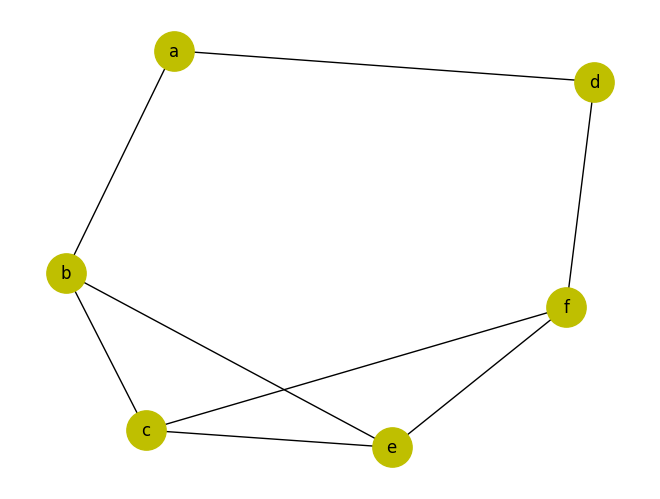

In [ ]:
vertices = ('a', 'b', 'c', 'd', 'e', 'f')
edges = [('a', 'b'), ('b', 'c'), ('a', 'd'), ('b', 'e'), ('b', 'a'),
         ('e', 'b'), ('e', 'c'), ('f', 'e'), ('c', 'f'), ('f', 'd')]

G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)

nx.draw(G,
        pos=nx.spring_layout(G),
        with_labels=True,
        node_color='y',
        node_size=800)

In [ ]:
bfs(G, 'a')

['a', 'b', 'd', 'c', 'e', 'f']

## Поиск в глубину

Алгоритм **DFS (depth-first search)** - это альтернатива BFS, используемая для поиска данных в графе. DFS отличается от BFS тем, что после запуска из корневой вершины алгоритм проходит как можно дальше по каждому из уникальных путей, перебирая их одина за другим.

Логика алгоритма следующая:

- Как только он успешно достигает конечной глубины каждого пути, он помечает флагом все вершины на этом пути как посещенные. После завершения пути алгоритм возвращается назад.
- Если он может найти еще один уникальный путь от корневого узла, процесс повторяется.
- Алгоритм продолжает двигаться по новым ветвям до тех пор, пока все ветви не будут посещены.

In [ ]:
def dfs(graph, start, result=[], visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    result.append(start)
    for next in set(graph[start]) - visited:
        dfs(graph, next, result, visited)
    return result

['0', '2', '6', '5', '1', '4', '3']

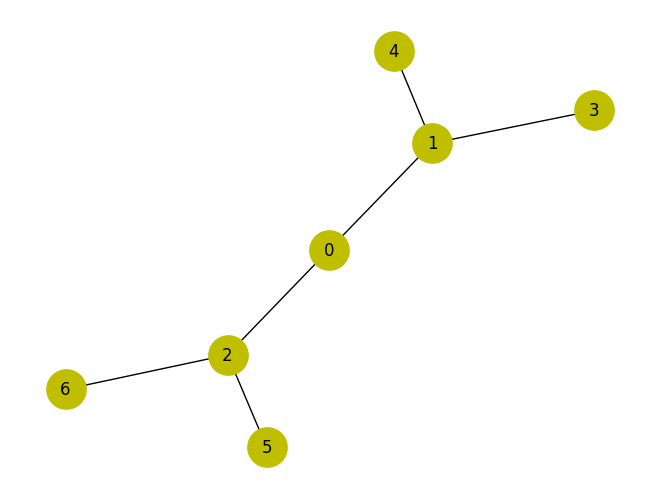

In [ ]:
graph = {'0': set(['1','2']),
         '1': set(['0','3', '4']),
         '2': set(['0','5', '6']),
         '3': set(['1']),
         '4': set(['1']),
         '5': set(['2']),
         '6': set(['2']),
         }

G = nx.Graph(graph)

nx.draw(G,
        pos=nx.spring_layout(G),
        with_labels=True,
        node_color='y',
        node_size=800)

dfs(graph, start='0')

## Задание (2 балла) + 4 б

Создать и нарисовать произвольный граф двумя описанными выше способами, и реальзовать для него алгоритмы BFS и DFS

bfs:
 time:  0.03743171691894531 
 result:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
bfs_my:
 time:  0.025033950805664062 
 result:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]



dfs:
 time:  0.0514984130859375 
 result:  [0, 1, 3, 8, 7, 4, 9, 10, 2, 5, 11, 12, 6, 13, 14]
dfs_my:
 time:  0.05054473876953125 
 result:  [0, 2, 6, 14, 13, 5, 12, 11, 1, 4, 10, 9, 3, 7, 8]


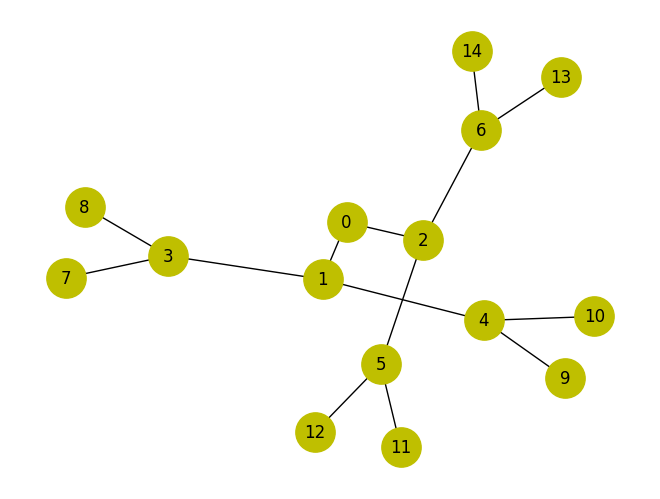

In [334]:
#решение
def benchmark(func):
    def wrapper(*args):
        start = time.time()
        return_value = func(*args)
        end = time.time()
        return (end-start)*1000, return_value
    return wrapper

def show(func_name, result):
    print(f'{func_name}:\n', 'time: ', result[0], '\n result: ', result[1])

def bfs(graph, start):
    visited = []
    queue = [start]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            neighbours = graph[node]
            for neighbour in neighbours:
                queue.append(neighbour)
    return visited

def bfs_my(graph, start):
    visited = [start]
    queue = [start]

    while queue:
        node = queue.pop(0)
        for neighbour in graph[node]:
            if neighbour not in visited:
                queue.append(neighbour)
                visited.append(neighbour)

    return visited

def dfs(graph, start, result=[], visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    result.append(start)
    for next in set(graph[start]) - visited:
        dfs(graph, next, result, visited)
    return result

def dfs_my(graph, start):
    visited = set()
    result = []
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            result.append(node)
            stack.extend(set(graph[node]) - visited)
    return result



graph = nx.balanced_tree(r = 2, h = 3);

nx.draw(graph,
        pos=nx.spring_layout(G),
        with_labels=True,
        node_color='y',
        node_size=800)

result = benchmark(bfs)
show('bfs', result(graph, 0))

result = benchmark(bfs_my)
show('bfs_my', result(graph, 0))

print('\n\n')

result = benchmark(dfs)
show('dfs', result(graph, 0))

result = benchmark(dfs_my)
show('dfs_my', result(graph, 0))